## Churn Prediction Using Customer Dataset

This project aims to predict customer churn — whether a customer is likely to stop using a service — using a labeled dataset. The objective is to build a machine learning model that can classify customers based on their behavior and profile data.

We work with two datasets:

* **Training Data**: `churn-bigml-80.csv`
  Contains 80% of the original data, used to train the model.

* **Testing Data**: `churn-bigml-20.csv`
  Contains the remaining 20% of the data, used to evaluate model performance.


### Step 1: Load and Inspect the Data

In [2]:
import numpy as np
import pandas as pd

train = pd.read_csv("churn-bigml-80.csv")
test = pd.read_csv("churn-bigml-20.csv")

train.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
train.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')


### 2. Exploratory Data Analysis & Outlier Handling

Analyzing the dataset to understand feature distributions, identify unusual patterns, and detect outliers. Outliers are treated or removed to improve model reliability and prevent skewed learning.



In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   667 non-null    object 
 1   Account length          667 non-null    int64  
 2   Area code               667 non-null    int64  
 3   International plan      667 non-null    object 
 4   Voice mail plan         667 non-null    object 
 5   Number vmail messages   667 non-null    int64  
 6   Total day minutes       667 non-null    float64
 7   Total day calls         667 non-null    int64  
 8   Total day charge        667 non-null    float64
 9   Total eve minutes       667 non-null    float64
 10  Total eve calls         667 non-null    int64  
 11  Total eve charge        667 non-null    float64
 12  Total night minutes     667 non-null    float64
 13  Total night calls       667 non-null    int64  
 14  Total night charge      667 non-null    fl

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [6]:
train.isna().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [7]:
train.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2661    False
2662    False
2663    False
2664    False
2665    False
Length: 2666, dtype: bool

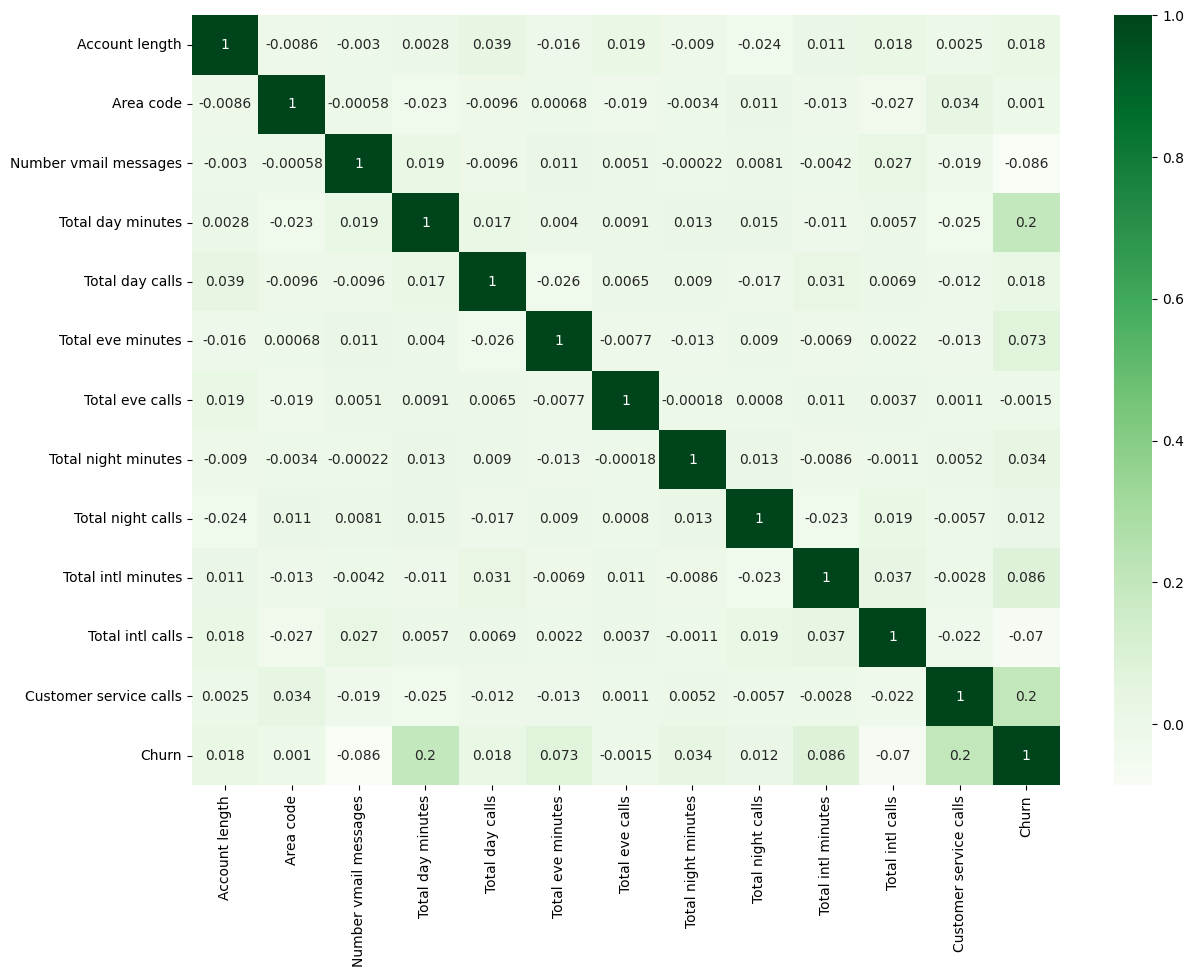

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14,10))
sns.heatmap(train.corr(numeric_only=True), annot=True , cmap="Greens")
plt.show()

In [9]:
features_to_drop = ['Total day charge', 'Total eve charge',
                   'Total night charge', 'Total intl charge' , "State"]

train.drop(features_to_drop, axis=1, inplace=True)
test.drop(features_to_drop, axis=1, inplace=True)

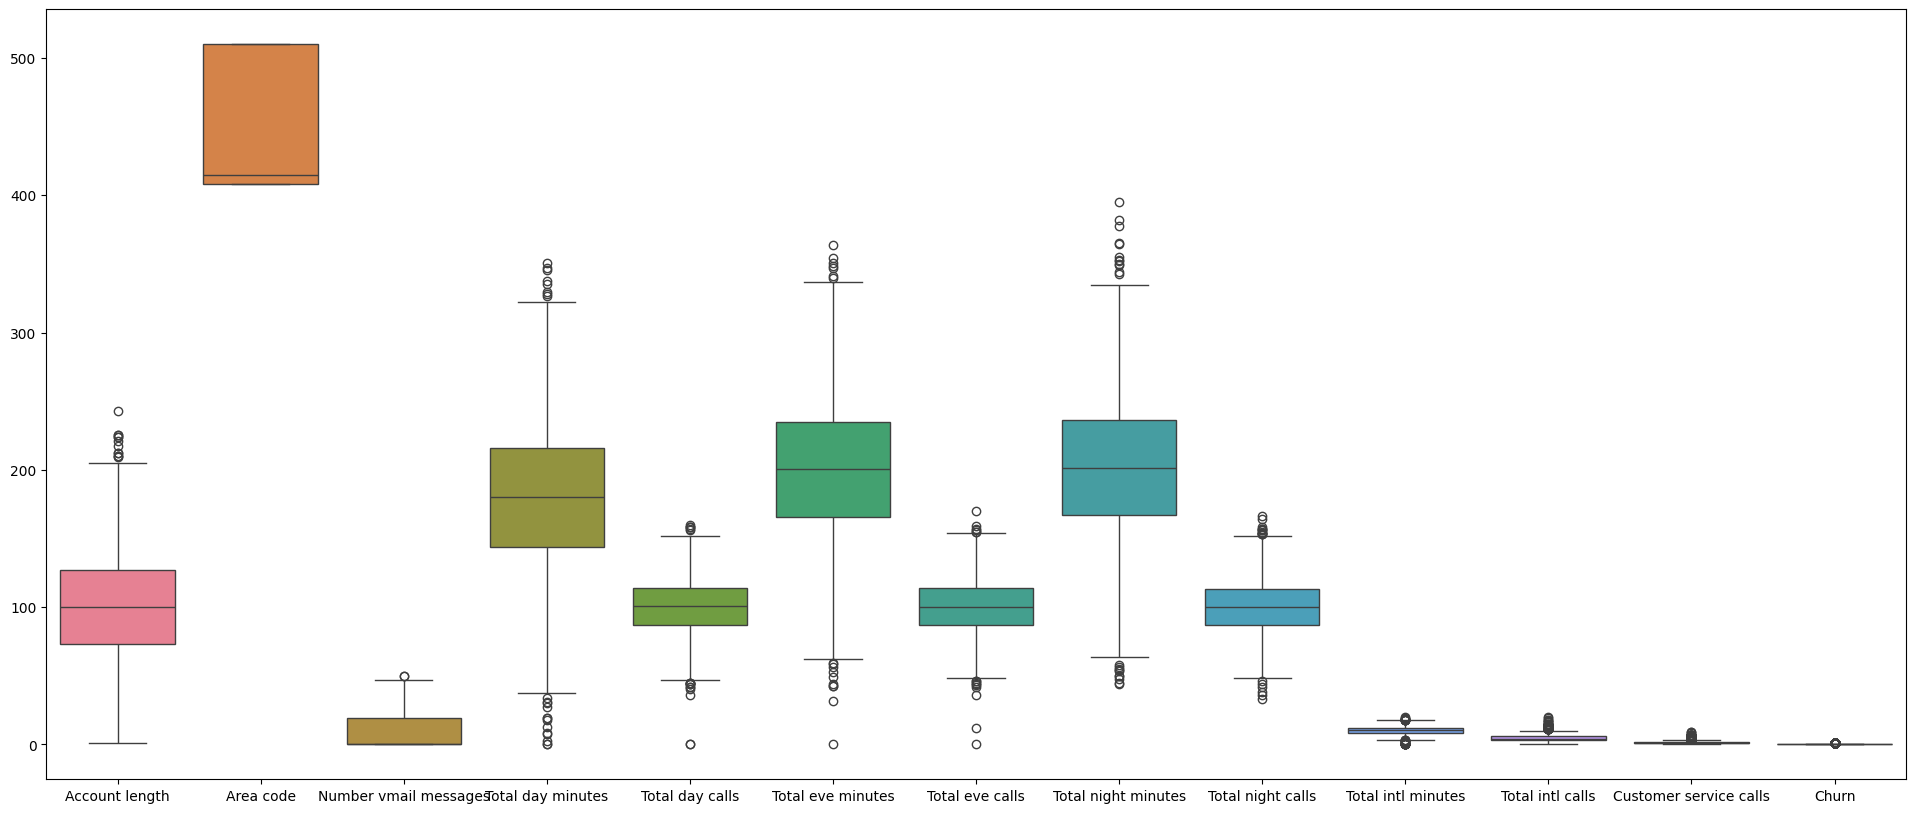

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(24,10))
sns.boxplot(train)
plt.show()

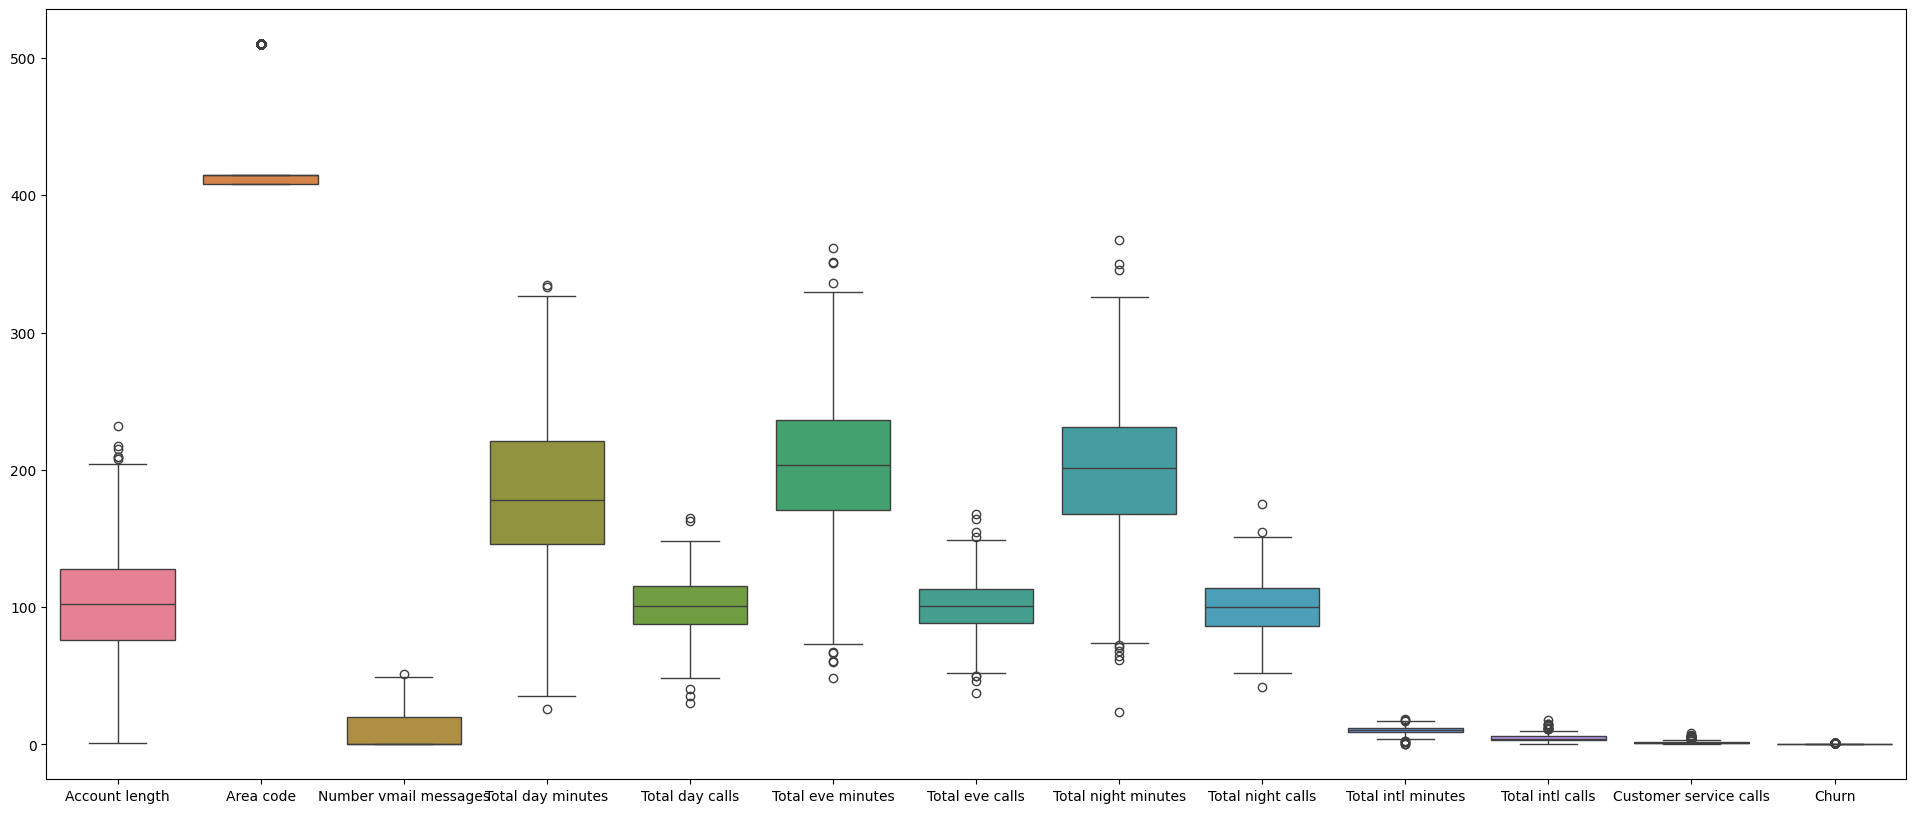

In [11]:
plt.figure(figsize=(24,10))
sns.boxplot(test)
plt.show()

In [12]:
train["Churn"].value_counts()

Churn
False    2278
True      388
Name: count, dtype: int64

### 3. Data Preprocessing

Applies outlier handling using the IQR method, scales numerical features using `StandardScaler`, and encodes categorical features with `LabelEncoder`. This prepares the data for machine learning by ensuring consistency and reducing noise.



In [20]:
# Preprocess the data with outlier handling
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder

def preprocess_the_data(df , handle_outliers = True):
    numeric_values = df.select_dtypes(include=["float64", "int64"]).copy()
    categorical_values = df.select_dtypes(exclude=[np.number]).copy()

    # Handle outliers using the IQR method
    if handle_outliers:
        for col in numeric_values.columns:
            Q1 = numeric_values[col].quantile(0.25)
            Q3 = numeric_values[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            # Clip values outside the IQR range
            numeric_values[col] = numeric_values[col].clip(lower=lower_bound, upper=upper_bound)

    # Scale numeric features
    scaler = StandardScaler()
    scaled_numeric = scaler.fit_transform(numeric_values)
    numeric_scaled = pd.DataFrame(
        scaled_numeric, columns=numeric_values.columns,
        index=df.index
    )

    # Encode categorical features
    for col in categorical_values.columns:
        le = LabelEncoder()
        categorical_values[col] = le.fit_transform(categorical_values[col].astype(str))

    # Combine processed features
    X = pd.concat([numeric_scaled, categorical_values], axis=1)

    return X


In [21]:
train.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total eve minutes,Total eve calls,Total night minutes,Total night calls,Total intl minutes,Total intl calls,Customer service calls,Churn
0,128,415,No,Yes,25,265.1,110,197.4,99,244.7,91,10.0,3,1,False
1,107,415,No,Yes,26,161.6,123,195.5,103,254.4,103,13.7,3,1,False
2,137,415,No,No,0,243.4,114,121.2,110,162.6,104,12.2,5,0,False
3,84,408,Yes,No,0,299.4,71,61.9,88,196.9,89,6.6,7,2,False
4,75,415,Yes,No,0,166.7,113,148.3,122,186.9,121,10.1,3,3,False


In [22]:
preprocessed_data = preprocess_the_data(train)
preprocessed_data.head()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total eve minutes,Total eve calls,Total night minutes,Total night calls,Total intl minutes,Total intl calls,Customer service calls,International plan,Voice mail plan,Churn
0,0.696113,-0.527811,1.248161,1.589712,0.487591,-0.059697,-0.052692,0.865152,-0.471723,-0.093647,-0.624084,-0.432233,0,1,0
1,0.163191,-0.527811,1.321668,-0.333187,1.144575,-0.097193,0.147383,1.057723,0.150191,1.269020,-0.624084,-0.432233,0,1,0
2,0.924508,-0.527811,-0.589519,1.186553,0.689740,-1.563490,0.497516,-0.764759,0.202017,0.716587,0.260215,-1.336732,0,0,0
3,-0.420485,-0.692467,-0.589519,2.226962,-1.483360,-2.733765,-0.602901,-0.083810,-0.575375,-1.345827,1.144513,0.472267,1,0,0
4,-0.648880,-0.527811,-0.589519,-0.238435,0.639203,-1.028676,1.097743,-0.282337,1.083062,-0.056818,-0.624084,1.376766,1,0,0



### 4. Test Preparation & Handling Class Imbalance

Preprocesses the test dataset and splits it into features (`x_test`) and labels (`y_test`).
To address class imbalance in the training data, **SMOTE** (Synthetic Minority Over-sampling Technique) is applied to generate synthetic examples for the minority class, ensuring balanced model training.


In [23]:
# Test data
test_data = preprocess_the_data(test , handle_outliers=False)
x_test = test_data.drop("Churn",axis=1)
y_test = test_data["Churn"]

In [24]:
from imblearn.over_sampling import SMOTE


X = preprocessed_data.drop("Churn",axis=1)
Y = preprocessed_data["Churn"]

sm = SMOTE()
X_resampled, y_resampled = sm.fit_resample(X, Y)



### 5. Model Training & Evaluation

Trained three different models for churn prediction:

* **Support Vector Machine (SVM)**
* **Random Forest Classifier**
* **Artificial Neural Network (ANN)**

Each model is evaluated on the test set to compare performance and determine the most effective approach for predicting customer churn.



              precision    recall  f1-score   support

           0       0.94      0.91      0.93       572
           1       0.56      0.67      0.61        95

    accuracy                           0.88       667
   macro avg       0.75      0.79      0.77       667
weighted avg       0.89      0.88      0.88       667



<Axes: >

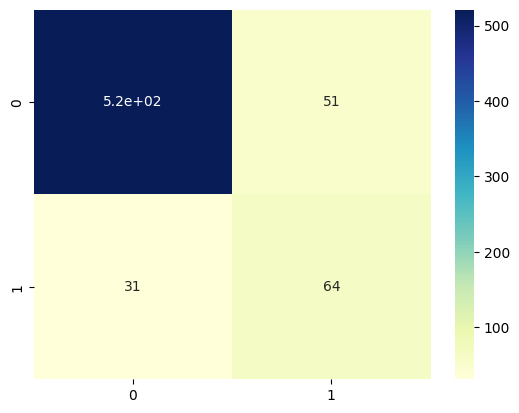

In [25]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report , confusion_matrix, accuracy_score
svc = SVC()
svc.fit(X_resampled, y_resampled)
y_pred = svc.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
sns.heatmap(cm, annot=True , cmap="YlGnBu")


              precision    recall  f1-score   support

           0       0.94      0.91      0.93       572
           1       0.56      0.67      0.61        95

    accuracy                           0.88       667
   macro avg       0.75      0.79      0.77       667
weighted avg       0.89      0.88      0.88       667



<Axes: >

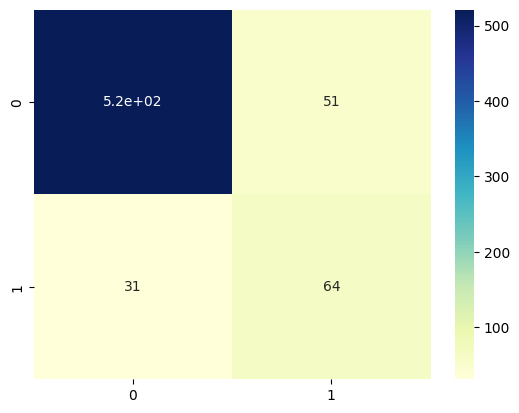

In [26]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_resampled, y_resampled)
y_pred = svc.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
sns.heatmap(cm, annot=True , cmap="YlGnBu")

In [27]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Dense(64, activation='relu', input_shape=(14,)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # Output for binary classification
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    X_resampled, y_resampled,
    epochs=30,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)

# Evaluate on test set
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

# Classification report
y_pred = (model.predict(x_test) > 0.5).astype("int32")
print(classification_report(y_test, y_pred))


Epoch 1/30


C:\Users\nufal\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5926 - loss: 0.6683 - val_accuracy: 0.7325 - val_loss: 0.5853
Epoch 2/30
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7272 - loss: 0.5504 - val_accuracy: 0.8048 - val_loss: 0.4919
Epoch 3/30
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7642 - loss: 0.4963 - val_accuracy: 0.7697 - val_loss: 0.5166
Epoch 4/30
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7735 - loss: 0.4841 - val_accuracy: 0.8158 - val_loss: 0.4477
Epoch 5/30
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7859 - loss: 0.4542 - val_accuracy: 0.8377 - val_loss: 0.3841
Epoch 6/30
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8098 - loss: 0.4345 - val_accuracy: 0.8048 - val_loss: 0.4377
Epoch 7/30
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8087 - loss: 0.4249 - val_accuracy: 0.8487 - val_loss: 0.3502
Epoch 8/30
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8162 - loss: 0.4129 - val_accuracy: 0.8158 - val_


### 6. Training Visualization

Plots training and validation **accuracy** and **loss** over epochs to evaluate the model’s learning progress. Helps in identifying overfitting, underfitting, and overall training performance of the neural network.



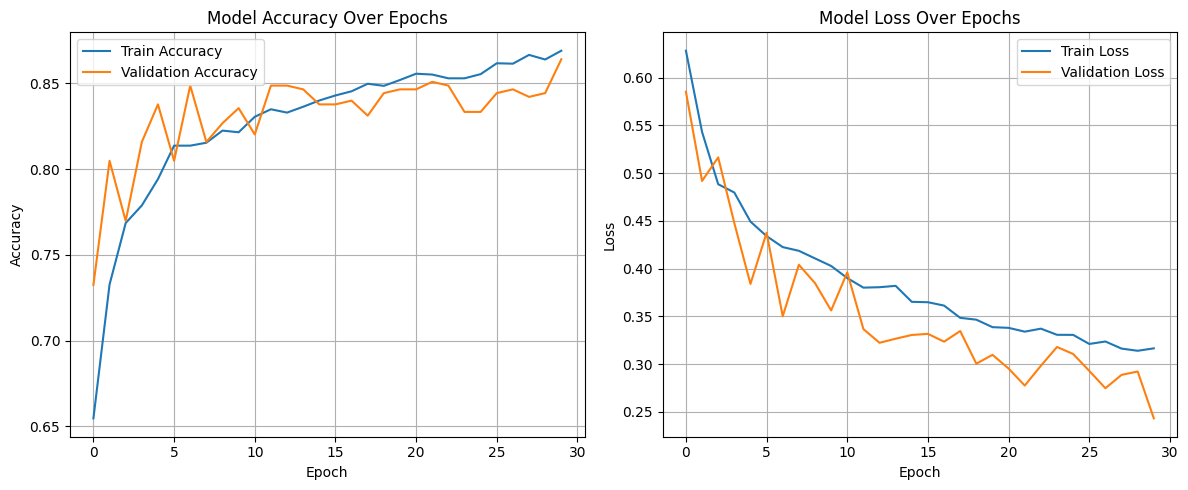

In [28]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
